In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deliveries = pd.read_csv("deliveries.csv")

In [3]:
matches = pd.read_csv("matches.csv")

In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries.shape

(179078, 21)

In [7]:
matches.shape

(756, 18)

In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [10]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [11]:
deliveries.drop(["player_dismissed"],axis=1,inplace=True)
deliveries.drop(["dismissal_kind"],axis=1,inplace=True)
deliveries.drop(["fielder"],axis=1,inplace=True)

In [12]:
deliveries.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [13]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
matces=matches.drop(["umpire3"],axis=1,inplace=True)

In [15]:
matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [16]:
matches["city"]=matches["city"].fillna(matches["city"].mode()[0])
matches["winner"]=matches["winner"].fillna(matches["winner"].mode()[0])
matches["player_of_match"]=matches["player_of_match"].fillna(matches["player_of_match"].mode()[0])
matches["umpire1"]=matches["umpire1"].fillna(matches["umpire1"].mode()[0])
matches["umpire2"]=matches["umpire2"].fillna(matches["umpire2"].mode()[0])

In [17]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [18]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [19]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin


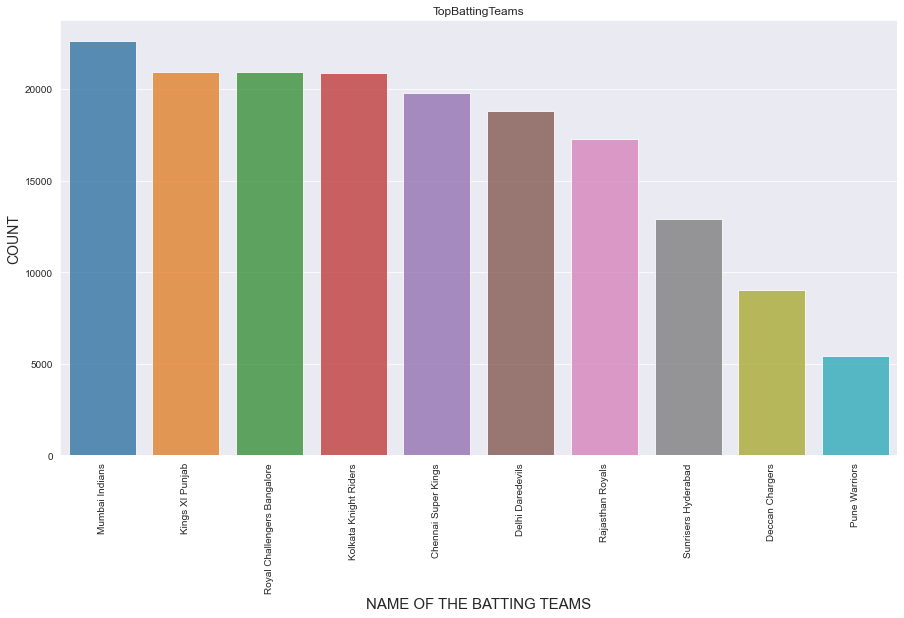

In [20]:
sns.set_style("darkgrid")
ls=deliveries['batting_team'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TopBattingTeams')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE BATTING TEAMS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### Mumbai Indians have the highest count followed by Kings XI Punjab.

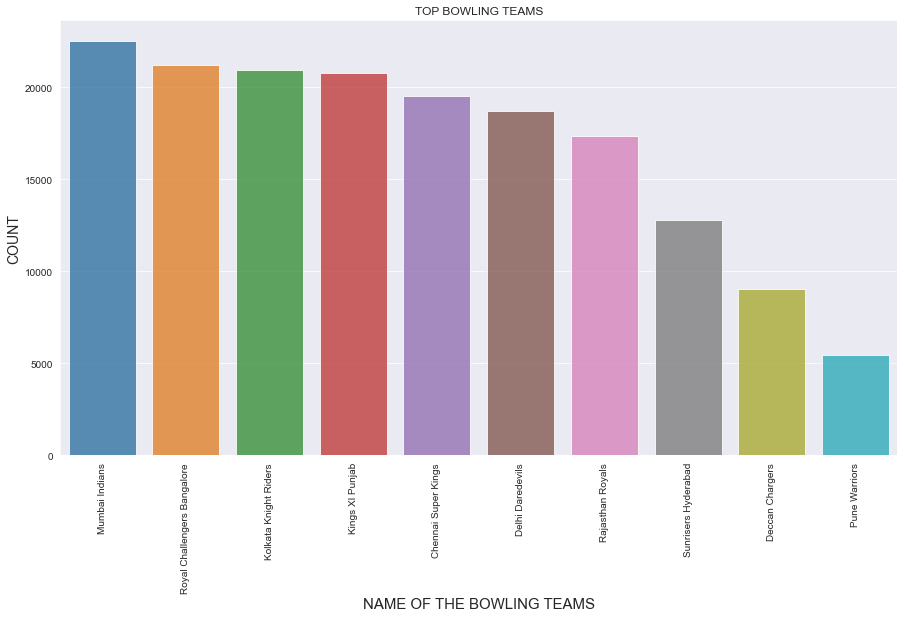

In [21]:
sns.set_style("darkgrid")
ls=deliveries['bowling_team'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TOP BOWLING TEAMS')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE BOWLING TEAMS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### Mumbai Indians have the highest count followed by Kings XI Punjab.

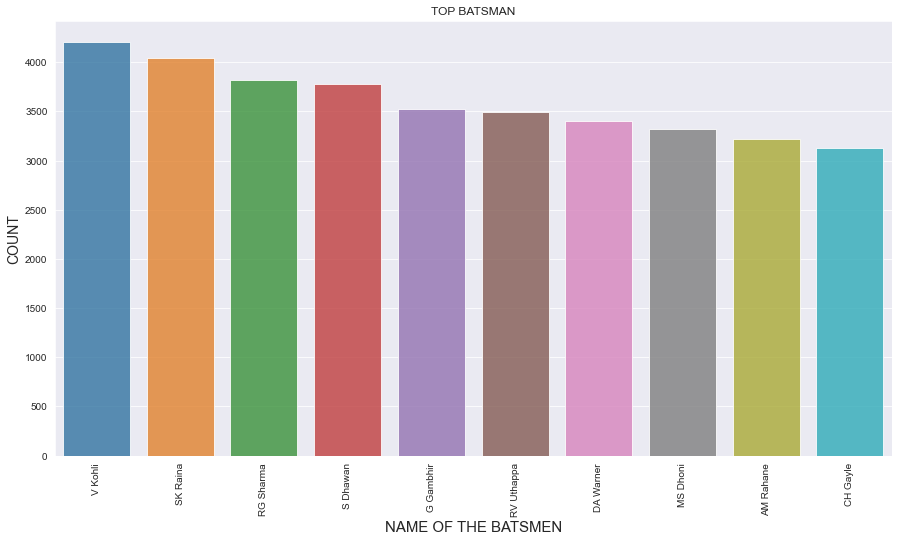

In [22]:
sns.set_style("darkgrid")
ls=deliveries['batsman'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TOP BATSMAN')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE BATSMEN', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### V Kohli has the highest count followed by SK Raina. 

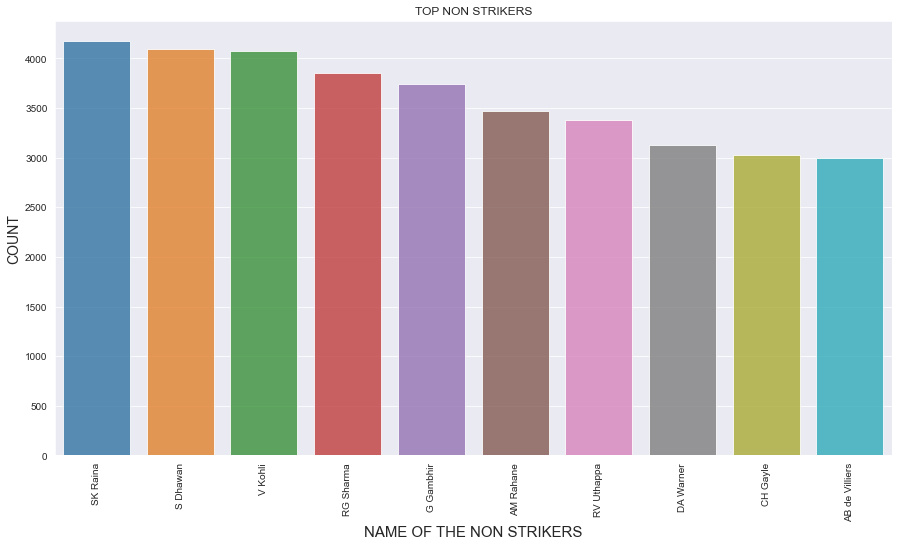

In [23]:
sns.set_style("darkgrid")
ls=deliveries['non_striker'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TOP NON STRIKERS')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE NON STRIKERS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

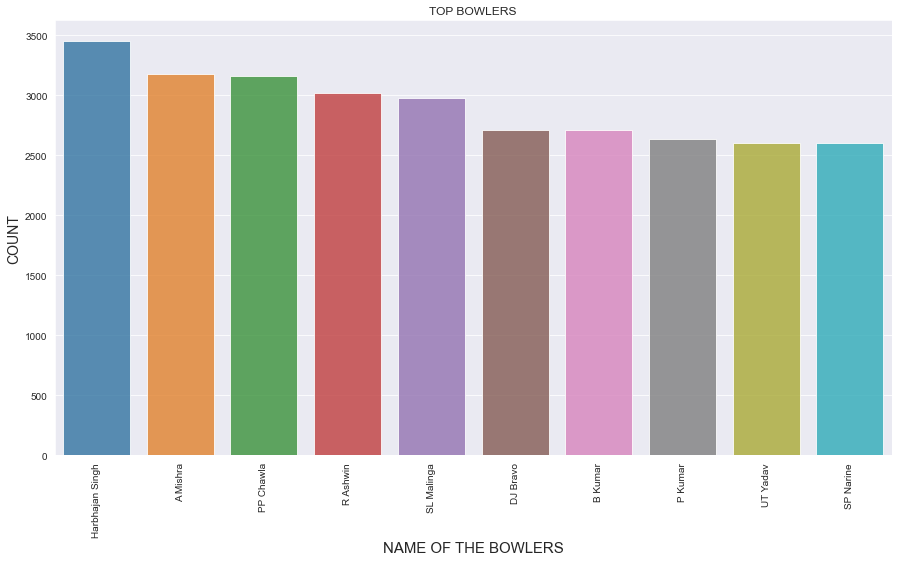

In [24]:
sns.set_style("darkgrid")
ls=deliveries['bowler'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TOP BOWLERS')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE BOWLERS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

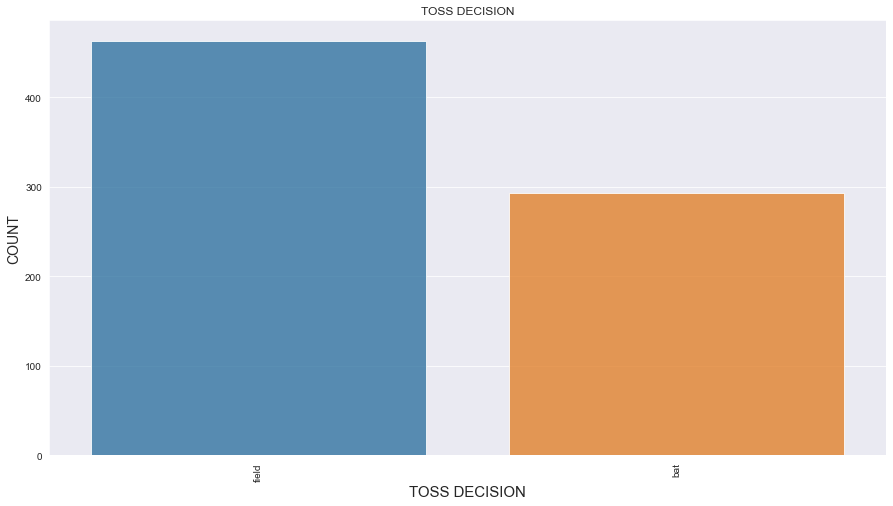

In [25]:
sns.set_style("darkgrid")
ls=matches['toss_decision'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TOSS DECISION')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('TOSS DECISION', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### Most of the teams had opted for fielding after winning a toss.

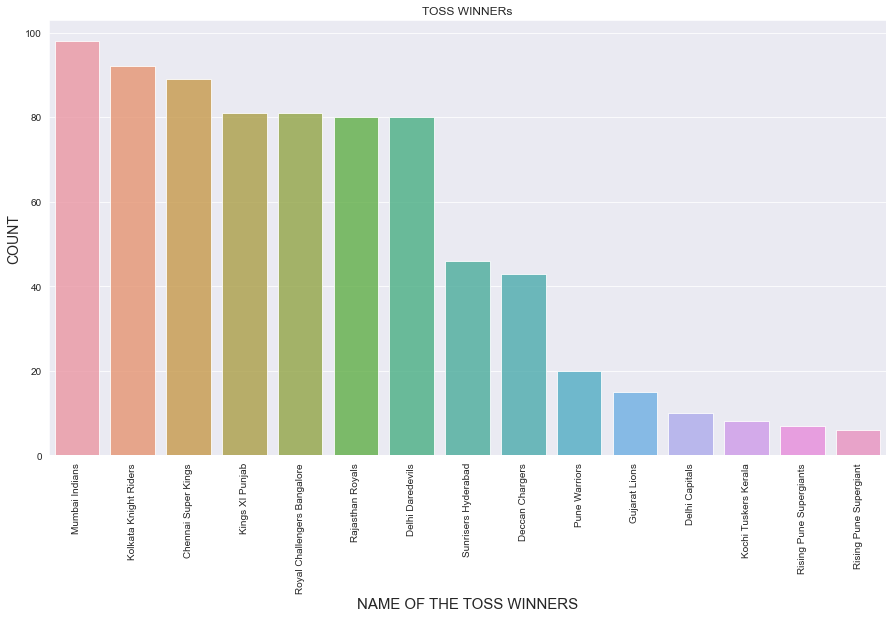

In [26]:
sns.set_style("darkgrid")
ls=matches['toss_winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TOSS WINNERs')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE TOSS WINNERS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

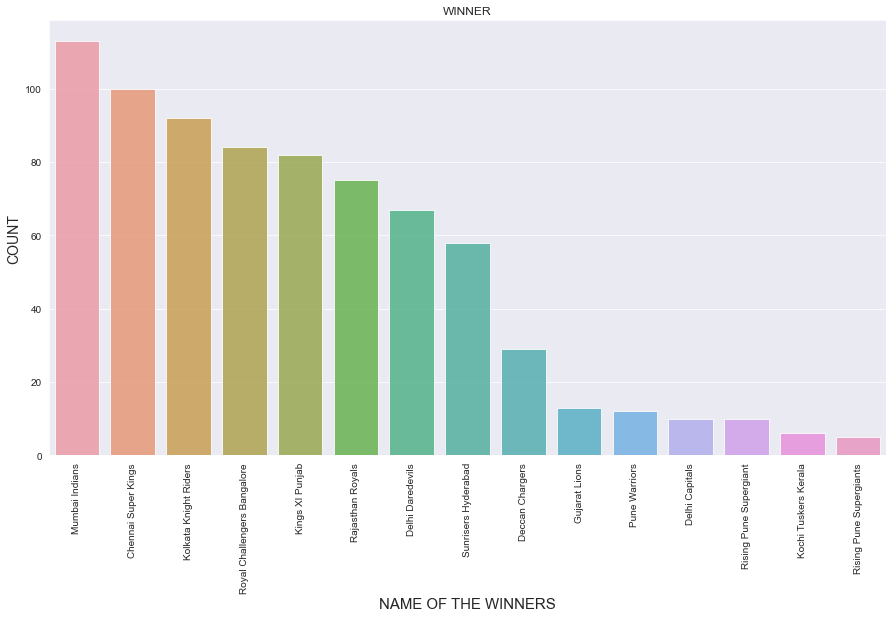

In [27]:
sns.set_style("darkgrid")
ls=matches['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('WINNER')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE WINNERS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='winner'>

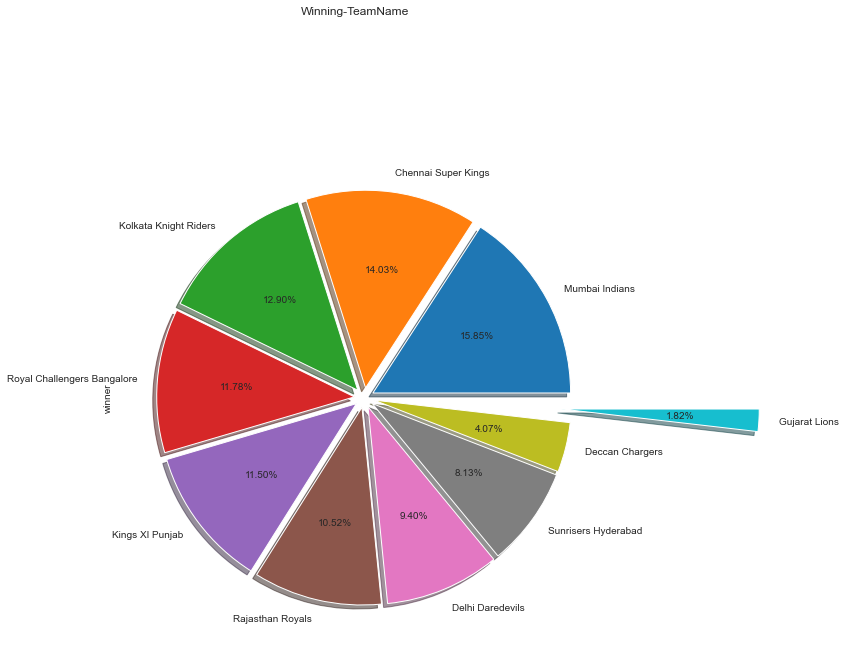

In [28]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Winning-TeamName")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
matches["winner"].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

### Mumbai Indians have more victories compared to other teams. 

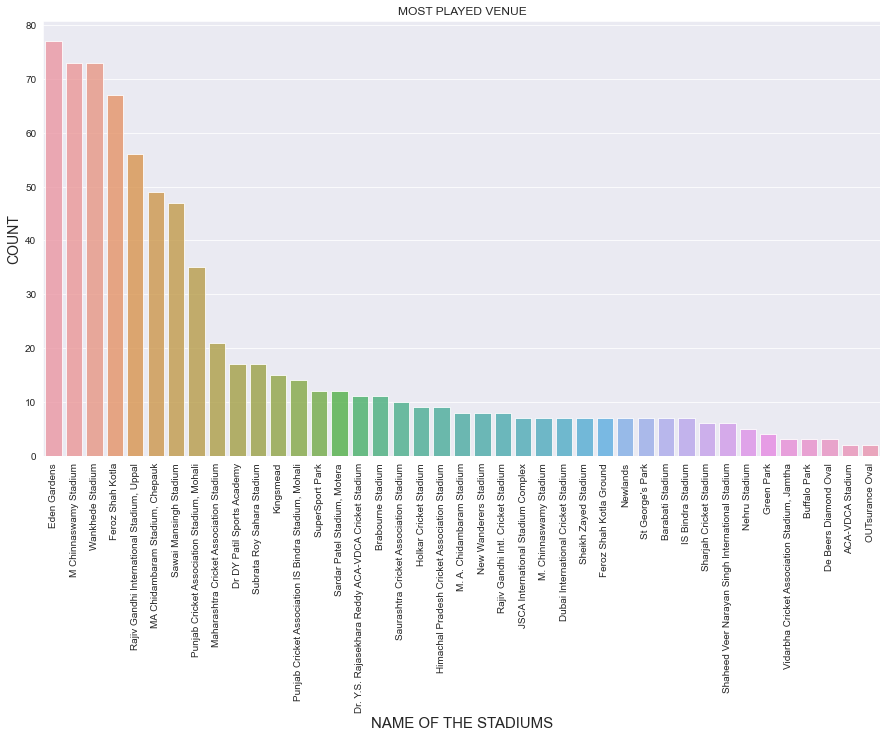

In [29]:
sns.set_style("darkgrid")
ls=matches['venue'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('MOST PLAYED VENUE')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE STADIUMS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### Most of the IPL matches were played in the Eden Gardens stadium.

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='player_of_match'>

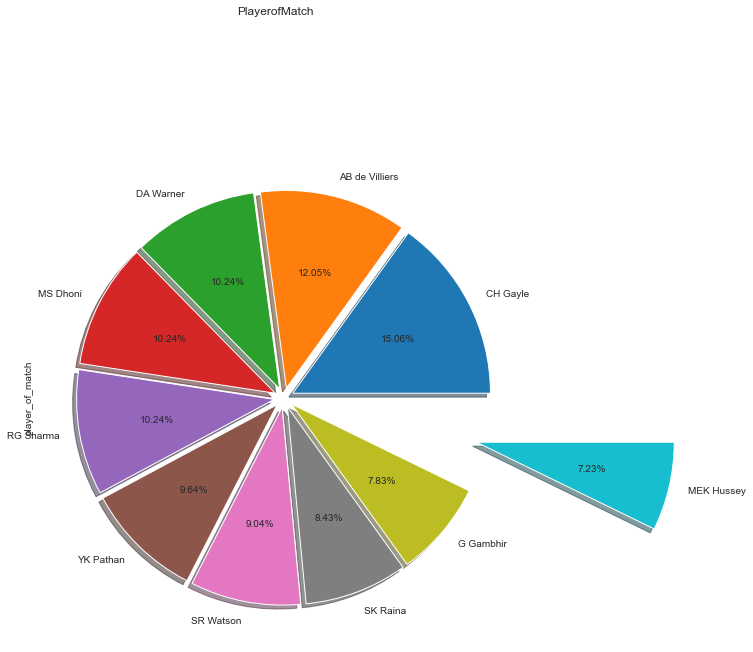

In [30]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("PlayerofMatch")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
matches["player_of_match"].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

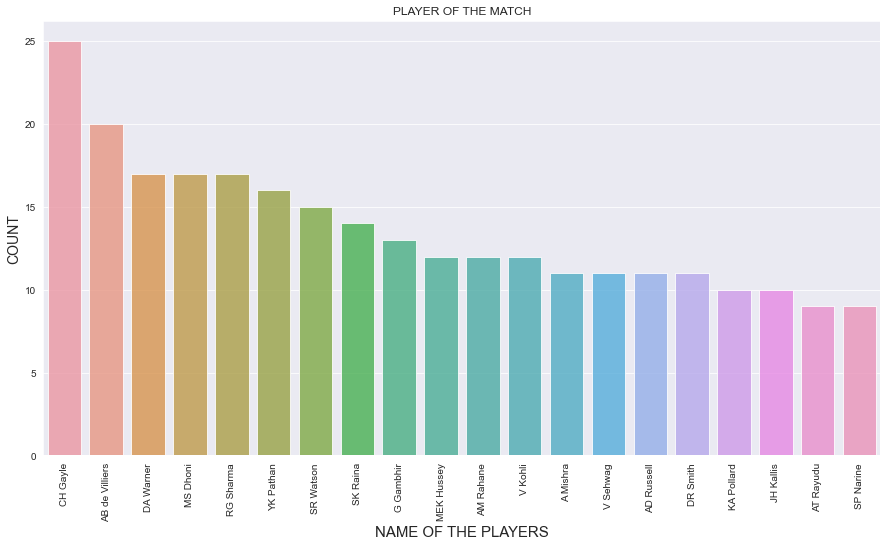

In [31]:
sns.set_style("darkgrid")
ls=matches['player_of_match'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('PLAYER OF THE MATCH')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE PLAYERS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### Chris Gayle has won the maximum number of Player of the Match title.

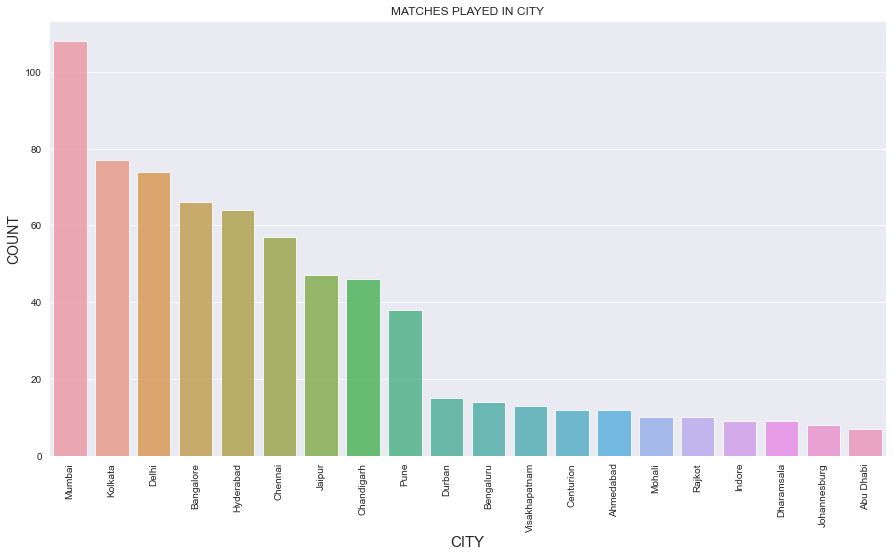

In [32]:
sns.set_style("darkgrid")
ls=matches['city'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('MATCHES PLAYED IN CITY')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('CITY', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### Most of the matches were played in the Mumbai city followed by Kolkata, Delhi.

<AxesSubplot:xlabel='Team'>

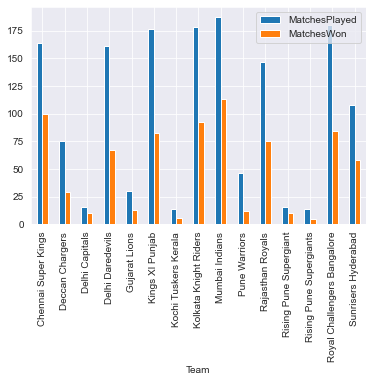

In [33]:
pd.merge(matches[['team1','team2']].stack().reset_index().groupby(0).count().reset_index().rename
         (columns = {0: 'Team','level_0':'MatchesPlayed'}),
         matches['winner'].value_counts().reset_index().rename(columns={'index':'Team','winner':'MatchesWon'}),
         on='Team').plot(x='Team',y=['MatchesPlayed','MatchesWon'],kind='bar')

## It would be a very good decision to sponsor teams like Mumbai Indians.
## Mumbai Indians have lot of victories compared to other teams.
## ChennaiSuperKings has the second most victories and can be sponsored aswell.
## Players that can be sponsored are V Kohli, SK Raina, S Dhawan, A Mishra Harbhajan Singh, AB de Villiers have a very good performance.
## The factors that made these teams on top is because of the performance of the players, Strong and good performance from these players led to a higher rate of success in the overall team performance.